In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")
print(df.shape)
df.tail()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df=df[["TV", "radio", "newspaper", "sales"]]
df.tail()
df.shape

(200, 4)

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


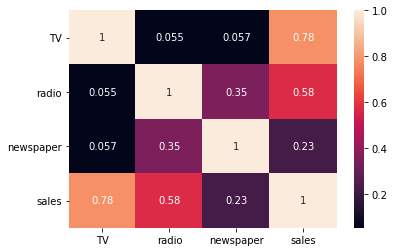

In [9]:
sns.heatmap(corr, annot = True)

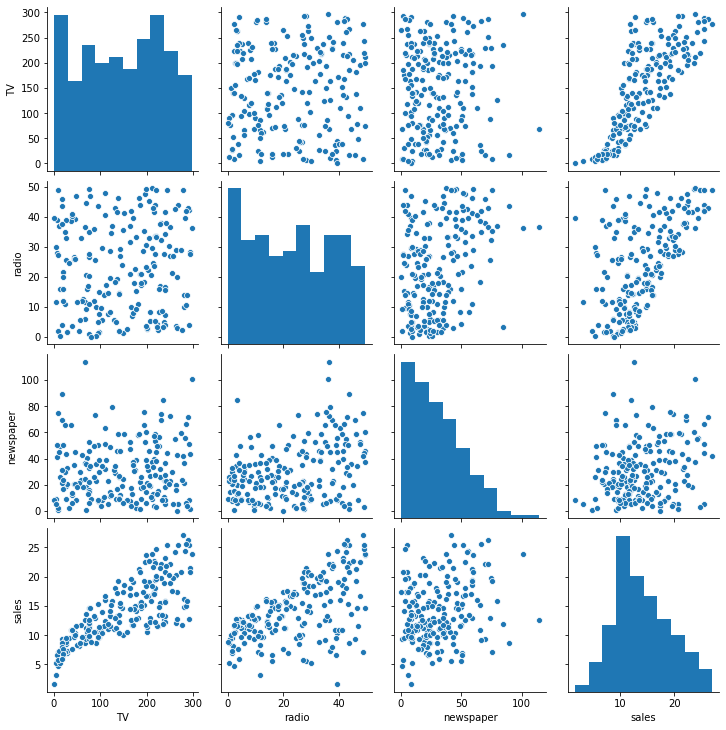

In [10]:
sns.pairplot(df[["TV", "radio", "newspaper", "sales"]])

In [12]:
df_y = df["sales"]
df_x = df[["TV", "radio", "newspaper"]]

In [14]:
df_y.shape, df_x.shape

((200,), (200, 3))

In [16]:
df_x.tail()

,TV,radio,newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


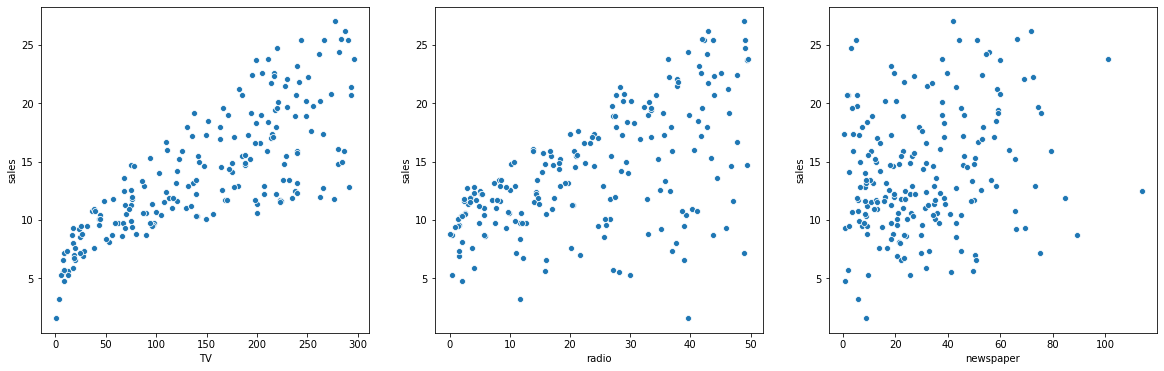

In [35]:
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols =3)

figure.set_size_inches(20,6)

sns.scatterplot(data = df, x= "TV", y="sales", ax= ax1)
sns.scatterplot(data = df, x= "radio", y="sales", ax= ax2)
sns.scatterplot(data = df, x= "newspaper", y="sales", ax=ax3)

#### * TV가 매출액과 가장 관련이 높은 것 같아 보임. 라디오도 상관관계가 있지만 신문의 상관관계는 확실하지 않아보임.